# pytorch
pytorch的目录结构非常清晰。本节只讲pytorch的根包部分。  
和Tensorflow一样，pytorch的研究对象就是Tensor，张量。  
何为张量？N维数组就是N维张量。  
整个计算过程就是一个图，张量表示结点，运算方式表示边。  
边可以执行求导操作，逆向反馈给前面的结点。  

三种东西：
* python中的数组
* numpy中的数组
* pytorch中的张量

In [4]:
import torch as t
from IPython.core.interactiveshell import InteractiveShell
import typing
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
al=[i for i in dir(t) if not i.startswith('_')]

In [2]:
al

['AVG',
 'AggregationType',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CONV_BN_FUSION',
 'CallStack',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ComplexType',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'DeepCopyMemoTable',
 'DeviceObjType',
 'DictType',
 'DisableTorchFunction',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'ExecutionPlan',
 'FUSE_ADD_RELU',
 'FatalError',
 'FileCheck',
 'FloatStorage',
 'FloatTensor',
 'FloatType',
 'FunctionSchema',
 'Future',
 'FutureType',
 'Generator',
 'Gradient',
 'Graph',
 'GraphExecutorState',
 'HOIST_CONV_PACKED_PARAMS',
 'HalfStorage',
 'HalfStorageBase',
 'HalfTensor',
 'INSERT_FOLD_PREPACK_OPS',
 'IODescriptor

# 创建张量

In [3]:
t.ones(2,2,2)

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [4]:
t.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [5]:
# 单位阵
t.eye(2,2)

tensor([[1., 0.],
        [0., 1.]])

In [39]:
t.from_numpy(np.eye(2,2))

tensor([[1., 0.],
        [0., 1.]], dtype=torch.float64)

In [13]:
t.linspace(0,10,3)

tensor([ 0.,  5., 10.])

In [14]:
t.logspace(0,1,10),10**(1/9)

(tensor([ 1.0000,  1.2915,  1.6681,  2.1544,  2.7826,  3.5938,  4.6416,  5.9948,
          7.7426, 10.0000]),
 1.2915496650148839)

In [17]:
# 一切跟numpy都是一样一样的
t.empty(2,2)

tensor([[8.2218e-10, 1.0244e-11],
        [2.6368e-09, 4.3441e-05]])

In [23]:
# 可以发现torch是完全兼容numpy的
np_attr=[i for i in dir(np) if not i.startswith('_')]
torch_attr=[i for i in dir(t) if not i.startswith('_')]
len(set(np_attr).intersection(set(torch_attr)))

212

# 随机数创建张量

In [26]:
# 均匀分布
t.rand(2,2)

tensor([[0.7405, 0.3035],
        [0.5675, 0.5874]])

In [27]:
# 正态分布
t.randn(2,2)

tensor([[ 0.1376,  2.1959],
        [-1.2275, -0.5918]])

In [29]:
# 产生随机排列，相当于shuffle
t.randperm(3)

tensor([1, 2, 0])

In [30]:
# arange,只知道起点+终点+步长
t.arange(1,3,1)

tensor([1, 2])

In [31]:
t.arange(1,3,0.7)

tensor([1.0000, 1.7000, 2.4000])

In [33]:
# t.range has deprecated, please use t.arange
# t.range是一个前闭后闭区间，而t.arange是一个前闭后开区间
t.range(1,3,1)

/Users/bytedance/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([1., 2., 3.])

In [83]:
# 当前的随机数种子
t.initial_seed()
t.manual_seed(2)
t.initial_seed()

7202140092237838327

2

In [85]:
# 返回随机数生成器当前的状态
t.get_rng_state()

tensor([2, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)

In [88]:
x=t.Tensor(3,3)
x

tensor([[ 0.0000e+00, -1.5846e+29,  5.0500e-31],
        [ 3.6902e+19,  1.1210e-44,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [91]:
# 执行张量的赋值操作，返回张量自身
x.uniform_(0,1)

tensor([[0.0573, 0.5657, 0.5332],
        [0.3901, 0.9088, 0.5334],
        [0.7073, 0.7116, 0.2050]])

In [90]:
x

tensor([[0.6147, 0.3810, 0.6371],
        [0.4745, 0.7136, 0.6190],
        [0.4425, 0.0958, 0.6142]])

In [94]:
x=t.rand(2,2)
x
t.bernoulli(x)# 以x中的概率值执行伯努利分布

tensor([[0.0458, 0.1755],
        [0.6177, 0.8291]])

tensor([[0., 0.],
        [0., 1.]])

In [97]:
# 正态分布
t.normal(mean=t.Tensor([0,1]),std=t.Tensor([1,2]))

tensor([1.2456, 3.1666])

# 索引、切片、连接、换位
对张量的各种变形

In [36]:
x=t.rand(1,2)
t.cat((x,x,x))

tensor([[0.6683, 0.0100],
        [0.6683, 0.0100],
        [0.6683, 0.0100]])

In [42]:
# 在一维空间上进行拼接
t.cat((x,x),1)

tensor([[0.6683, 0.0100, 0.6683, 0.0100]])

In [45]:
# chunk,把a张量在维度dim上切分成5块，返回一个张量tuple
a=t.arange(11)
t.chunk(a,5,0)

(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([ 9, 10]))


gather比较难以理解
```
out[i][j][k] = tensor[index[i][j][k]][j][k]  # dim=0
out[i][j][k] = tensor[i][index[i][j][k]][k]  # dim=1
out[i][j][k] = tensor[i][j][index[i][j][k]]  # dim=3
```

In [48]:
x = t.Tensor([[1,2],[3,4]])
t.gather(x, 1, t.LongTensor([[0,0],[1,0]]))

tensor([[1., 1.],
        [4., 3.]])

In [53]:
# index_select执行选择操作
x = t.randn(3, 4)
x
indices = t.LongTensor([0, 2])
t.index_select(x, 0, indices)# 选择第一行和第三行
t.index_select(x, 1, indices)# 选择第一列和第三列

tensor([[-0.4643, -0.7866,  1.6463, -0.3205],
        [ 0.7464, -1.5128, -1.6351, -1.2506],
        [-0.2056,  1.0885,  1.2990,  0.5303]])

tensor([[-0.4643, -0.7866,  1.6463, -0.3205],
        [-0.2056,  1.0885,  1.2990,  0.5303]])

tensor([[-0.4643,  1.6463],
        [ 0.7464, -1.6351],
        [-0.2056,  1.2990]])

In [60]:
# mask_select 执行选择操作，最终会变成一个一维数组
t.masked_select(x,t.BoolTensor([True,False,True,False]))

tensor([-0.4643,  1.6463,  0.7464, -1.6351, -0.2056,  1.2990])

In [62]:
t.masked_select(x,t.BoolTensor([
    [True,False,True,False],
    [True,False,True,False],
    [True,False,True,False],
]))

tensor([-0.4643,  1.6463,  0.7464, -1.6351, -0.2056,  1.2990])

In [64]:
x=t.randint(0,3,(3,3))

In [67]:
# nonzero相当于np.argwhere,返回一个下标列表
x
t.nonzero(x)

tensor([[2, 0, 0],
        [2, 0, 2],
        [1, 0, 2]])

tensor([[0, 0],
        [1, 0],
        [1, 2],
        [2, 0],
        [2, 2]])

t.split和t.chunk是一家子，split指定每个分块的大小，chunk指定分块的个数，split类似np.arange(指定步长)，chunk指定元素个数类似np.linspace。
split都有第三维参数dim，表示在哪个维度进行切分。

In [70]:
x=t.arange(0,10,3)
x
t.split(x,3)

tensor([0, 3, 6, 9])

(tensor([0, 3, 6]), tensor([9]))

In [72]:
# 把x.shape中的1去掉
t.squeeze(t.Tensor([[1,2]]))

tensor([1., 2.])

In [75]:
# 元素堆叠
t.stack([t.Tensor([1,2]),t.Tensor([3,4])])
t.stack([t.Tensor([1,2]),t.Tensor([3,4])],dim=1)

tensor([[1., 2.],
        [3., 4.]])

tensor([[1., 3.],
        [2., 4.]])

In [76]:
# 二维矩阵转置
t.t(t.Tensor([[1,2],[3,4]]))

tensor([[1., 3.],
        [2., 4.]])

In [78]:
# 更加灵活的转置transpose,转置的本质就是改变张量中的各个轴的顺序
t.transpose(t.Tensor([[1,2],[3,4]]),0,1)

tensor([[1., 3.],
        [2., 4.]])

In [81]:
# 沿着某个维度进行切片
t.unbind(t.Tensor([[1,2],[3,4]]),dim=1)

(tensor([1., 3.]), tensor([2., 4.]))

In [82]:
t.unsqueeze(t.Tensor([[1,2],[3,4]]),dim=1)

tensor([[[1., 2.]],

        [[3., 4.]]])

# 序列化

In [ ]:
x=t.rand(2,2)
t.save(x,open('haha'))
t.load(x,open('haha'))

# 并行化相关参数

In [98]:
t.get_num_threads()

4

In [99]:
t.set_num_threads(2)
t.get_num_threads()

2

# pointwise数学操作
* abs、ceil、clamp（设置上界下界）、floor、frac（返回分数部分）
* 三角函数：acos、asin、atan、atan2、sin、cos、tan、cosh、sinh、tanhb
* 指数函数：exp、log、log1p、pow
* add、div、fmod

In [106]:
x = t.randn(6)
y = t.randn(1, 6)
z = t.randn(6, 1)
t.addcdiv(x,y,z,value=0.1)

tensor([[-1.7592, -1.2940, -1.9493,  0.9096, -1.2394, -0.5088],
        [-1.0384, -0.5843, -1.2465, -0.2255,  0.0258, -0.5319],
        [-1.1735, -0.7173, -1.3783, -0.0127, -0.2114, -0.5276],
        [-3.5626, -3.0696, -3.7075,  3.7495, -4.4045, -0.4510],
        [-1.2392, -0.7820, -1.4423,  0.0907, -0.3266, -0.5255],
        [-1.2934, -0.8354, -1.4952,  0.1760, -0.4218, -0.5237]])

In [107]:
x+y/z*0.1

tensor([[-1.7592, -1.2940, -1.9493,  0.9096, -1.2394, -0.5088],
        [-1.0384, -0.5843, -1.2465, -0.2255,  0.0258, -0.5319],
        [-1.1735, -0.7173, -1.3783, -0.0127, -0.2114, -0.5276],
        [-3.5626, -3.0696, -3.7075,  3.7495, -4.4045, -0.4510],
        [-1.2392, -0.7820, -1.4423,  0.0907, -0.3266, -0.5255],
        [-1.2934, -0.8354, -1.4952,  0.1760, -0.4218, -0.5237]])

In [108]:
t.addcmul(x,y,z,value=0.1)
x+y*z*0.1

tensor([[-1.1301, -0.6746, -1.3360, -0.0811, -0.1352, -0.5289],
        [-1.0693, -0.6147, -1.2766, -0.1769, -0.0284, -0.5309],
        [-1.2129, -0.7561, -1.4166,  0.0492, -0.2804, -0.5263],
        [-1.1248, -0.6694, -1.3308, -0.0894, -0.1259, -0.5291],
        [-1.1621, -0.7061, -1.3671, -0.0308, -0.1913, -0.5279],
        [-1.1496, -0.6938, -1.3550, -0.0503, -0.1694, -0.5283]])

tensor([[-1.1301, -0.6746, -1.3360, -0.0811, -0.1352, -0.5289],
        [-1.0693, -0.6147, -1.2766, -0.1769, -0.0284, -0.5309],
        [-1.2129, -0.7561, -1.4166,  0.0492, -0.2804, -0.5263],
        [-1.1248, -0.6694, -1.3308, -0.0894, -0.1259, -0.5291],
        [-1.1621, -0.7061, -1.3671, -0.0308, -0.1913, -0.5279],
        [-1.1496, -0.6938, -1.3550, -0.0503, -0.1694, -0.5283]])

In [112]:
# 执行线性插值
t.lerp(t.Tensor([1]),t.Tensor([2]),0.9)
0.9*2+0.1*1

tensor([1.9000])

1.9000000000000001

In [120]:
t.log1p(t.Tensor([2])),np.log1p(2),np.log(3)

(tensor([1.0986]), 1.0986122886681098, 1.0986122886681098)

In [123]:
# 取负数
t.neg(t.Tensor([2]))

tensor([-2.])

In [124]:
# 取倒数
t.reciprocal(t.Tensor([2]))

tensor([0.5000])

In [127]:
# 平方根倒数
t.rsqrt(t.Tensor([2])),1/2**0.5

(tensor([0.7071]), 0.7071067811865475)

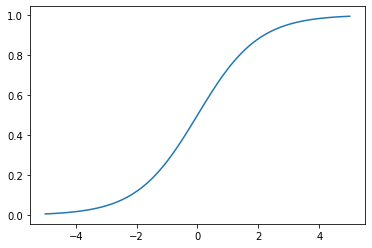

In [130]:
x=t.linspace(-5,5)
y=t.sigmoid(x)
plt.plot(x,y)

# reduction 数学操作

In [132]:
t.cumprod(t.Tensor([1,2,3]),0)

tensor([1., 2., 6.])

In [134]:
t.cumsum(t.Tensor([1,2,3]),0)

tensor([1., 3., 6.])

In [139]:
# 张量的p范数
t.dist(t.Tensor([1,2,3]),t.Tensor([4,5,6]),p=2)

tensor(5.1962)

In [140]:
t.mean(t.Tensor([1,2,3]))

tensor(2.)

In [141]:
t.median(t.Tensor([1,2,3]))

tensor(2.)

In [143]:
# 张量的p范数
t.norm(t.Tensor([1,2,3]),p=1)

tensor(6.)

In [146]:
t.norm(t.rand(2,3,4),p=3)

tensor(1.5553)

In [147]:
t.prod(t.rand(3)),t.prod(t.rand(3))

(tensor(0.0556), tensor(0.1936))

In [150]:
t.std(t.rand(3)),t.sum(t.rand(3)),t.var(t.rand(3))

(tensor(0.3823), tensor(1.0044), tensor(0.1645))

# 比较操作

In [155]:
# eq是比较数值上是否相等
t.eq(t.ones(3,3),1)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [154]:
# equal是比较两个张量是否完全相等
t.equal(t.ones(3,3),t.Tensor(1))

False

In [157]:
# 寻找第k大的数值
t.kthvalue(t.rand(10),k=2)

torch.return_types.kthvalue(
values=tensor(0.1370),
indices=tensor(2))

# 统计

In [7]:
# 获取元素个数
t.numel(t.ones(3,3,3))

27

# 变量

In [14]:
from torch.autograd import Variable
# 变量默认是不可导的
Variable(t.randn(3))
_.requires_grad
t.randn(3)

tensor([-0.7237, -0.3723,  0.8373])

False

tensor([-0.6385, -0.4154,  0.4988])

In [16]:
Variable(t.randn(3),requires_grad=True)
_.requires_grad

tensor([ 1.7217, -0.4256,  1.5152], requires_grad=True)

True

require_grad属性会传递

volatile决定了require_grad=False，只要有一个volatile=True的输入，输出就是volatile。

In [17]:
x=t.rand(2)

In [19]:
x
x[0]=10
x

tensor([0.4973, 0.8506])

tensor([10.0000,  0.8506])

In [20]:
x.sub_(2)

tensor([ 8.0000, -1.1494])

In [21]:
x.data

tensor([ 8.0000, -1.1494])

In [22]:
type(x),type(x.data)

(torch.Tensor, torch.Tensor)

# nn.Module

In [5]:

import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, (5,))  # submodule: Conv2d
        self.conv2 = nn.Conv2d(20, 20, (5,))

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))


class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.add_module("conv", nn.Conv2d(10, 20, (4,)))
        # self.conv = nn.Conv2d(10, 20, 4) 和上面这个增加module的方式等价


x = Model()
y = Model2()

In [12]:
# children:只包含一层
list(x.children())
# modules：包含多层
list(x.modules())
list(y.children())
list(y.modules())

[Conv2d(1, 20, kernel_size=(5,), stride=(1, 1)),
 Conv2d(20, 20, kernel_size=(5,), stride=(1, 1))]

[Model(
   (conv1): Conv2d(1, 20, kernel_size=(5,), stride=(1, 1))
   (conv2): Conv2d(20, 20, kernel_size=(5,), stride=(1, 1))
 ),
 Conv2d(1, 20, kernel_size=(5,), stride=(1, 1)),
 Conv2d(20, 20, kernel_size=(5,), stride=(1, 1))]

[Conv2d(10, 20, kernel_size=(4,), stride=(1, 1))]

[Model2(
   (conv): Conv2d(10, 20, kernel_size=(4,), stride=(1, 1))
 ),
 Conv2d(10, 20, kernel_size=(4,), stride=(1, 1))]

In [11]:
list(y.named_children())
list(y.named_modules())

[('conv', Conv2d(10, 20, kernel_size=(4,), stride=(1, 1)))]

[('',
  Model2(
    (conv): Conv2d(10, 20, kernel_size=(4,), stride=(1, 1))
  )),
 ('conv', Conv2d(10, 20, kernel_size=(4,), stride=(1, 1)))]

Module是pytorch中最重要的概念，它相当于一个结点，接收一堆输入，产生一个输出。  
pytorch也提供了一个Module的封装：使用Sequential：把多个Module串行起来

In [14]:
from collections import OrderedDict
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )
# Example of using Sequential with OrderedDict
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))

为了便于注册Module和Parameters，使用ModuleList和ParameterList赋值给类的属性。

In [17]:
# 使用ModuleList注册模块
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed         using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

In [18]:
# 使用ParameterList注册parameter
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(10, 10)) for i in range(10)])

    def forward(self, x):
        # PrameterList can act as an iterable, or be indexed using ints
        for i, p in enumerate(self.params):
            x = self.params[i // 2].mm(x) + p.mm(x)
        return x

# CV相关Module
CV相关的Module包括：
* 卷积层
  * Conv1D
  * Conv2D
  * Conv3D
* 逆卷积层
  * ConvTranspose1D
  * ConvTranspose2D
  * ConvTranspose3D
* 池化层：(Adaptive+_)×(max+avg)×(pool+unpool)×(1D+2D+3D)
  * MaxPool1D、MaxUnpool1D
  * MaxPool2D、MaxUnpool2D
  * MaxPool3D、MaxUnpool3D
  * AvgPool1D、AvgUnpool1D
  * AvgPool2D、AvgUnpool2D
  * AvgPool3D、AvgUnpool3D


# 激活函数

# 正则化层

# 数据集

In [19]:
import torchvision
import mnist

ds=torchvision.datasets.MNIST(mnist.mnist_dir,download=mnist.should_download())


In [20]:
dir(ds)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_format_transform_repr',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [22]:
ds.data.shape

torch.Size([60000, 28, 28])

In [25]:
ds.train_data.shape,ds.test_data.shape,ds.targets,ds.test_labels

/Users/bytedance/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


(torch.Size([60000, 28, 28]),
 torch.Size([60000, 28, 28]),
 tensor([5, 0, 4,  ..., 5, 6, 8]),
 tensor([5, 0, 4,  ..., 5, 6, 8]))

In [27]:
ds.targets.

tensor([5, 0, 4,  ..., 5, 6, 8])

In [26]:
ds.data.shape,ds.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))